In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
users_evaluation = pd.read_csv('users_evaluation_of_satisfaction.csv')
support_tickets = pd.read_csv('support_tickets.csv')

In [4]:
users_evaluation.result_mentioned_by_user.value_counts()

Отлично                 110159
Не удовлетворительно     45704
Хорошо                   31457
Нейтрально               17994
Удовлетворительно        12219
Name: result_mentioned_by_user, dtype: int64

In [6]:
df1 = support_tickets.merge(users_evaluation)

In [9]:
df1.head(1)

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо


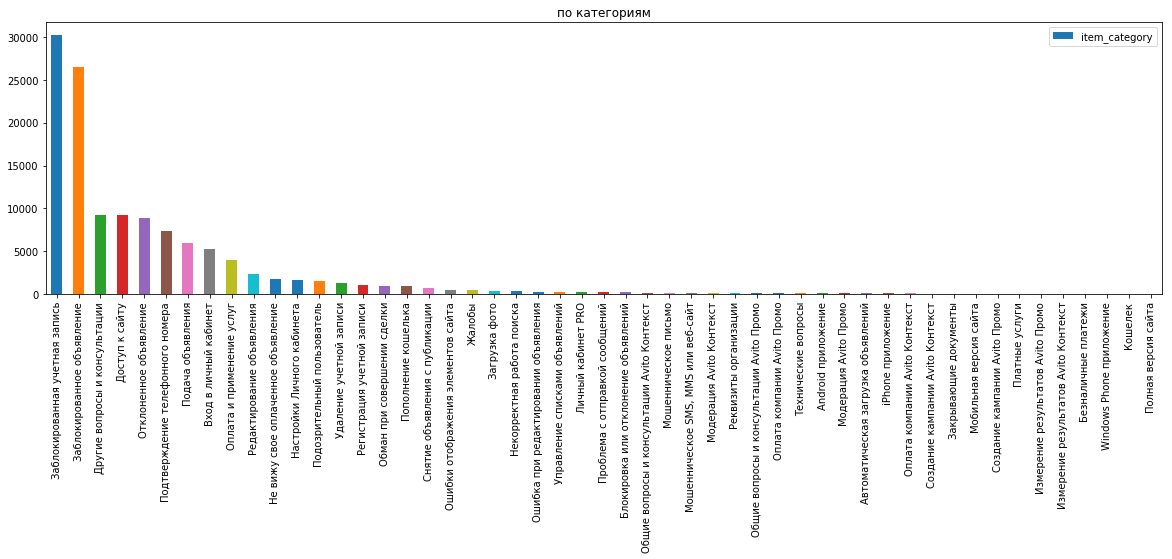

In [8]:
plt.figure(figsize=(20,5))
df1['ticket_subcategory'].value_counts().plot(kind='bar', label='item_category')
plt.legend()
plt.title('по категориям');

In [10]:
df1.dtypes

user_id                     object
ticket_category             object
ticket_subcategory          object
current_state               object
request_id                  object
activity_start_dt           object
fact_reaction_dt            object
result_mentioned_by_user    object
dtype: object

In [11]:
df1["activity_start_dt"] = pd.to_datetime(df1["activity_start_dt"])
df1["fact_reaction_dt"] = pd.to_datetime(df1["fact_reaction_dt"])
df1['time_answer'] = df1.fact_reaction_dt - df1.activity_start_dt
df1['time_answer'] = df1['time_answer'].dt.days.astype('int16')
df1.head(2)

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6
1,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,Отлично,4


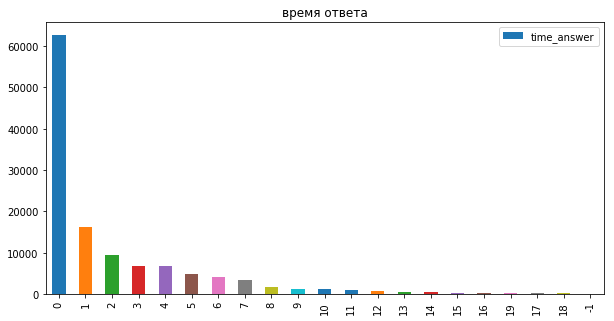

In [21]:
time_answer = df1.query('time_answer < 20')
plt.figure(figsize=(10,5))
time_answer['time_answer'].value_counts().plot(kind='bar', label='time_answer')
plt.legend()
plt.title('время ответа');

In [28]:
df1.groupby('ticket_category', as_index = False).agg({'time_answer':'median'})

,ticket_category,time_answer
0,Безопасность на Avito,0
1,Блокировки и отклонения,0
2,"Магазины, Автозагрузка и юридические лица",0
3,Мобильный Avito,3
4,Платные услуги и сервисы,4
5,Работа с объявлениями и личным кабинетом,1
6,Рекламные сервисы Avito,0
7,Технические вопросы,2
